<IPython.core.display.Javascript object>


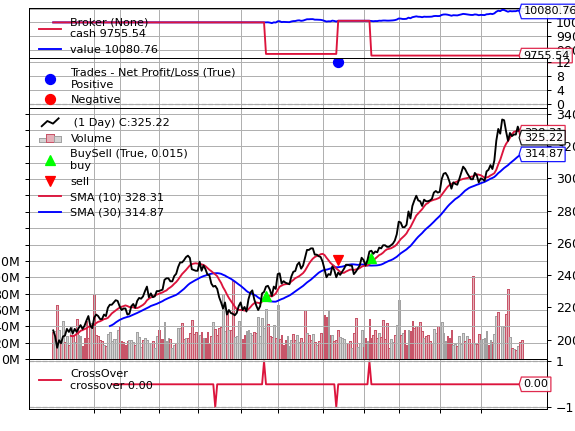

[[<Figure size 640x480 with 5 Axes>]]

In [1]:
from datetime import datetime
import backtrader as bt
import datah5

class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)


cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)
"""
data0 = bt.feeds.YahooFinanceData(dataname='2330.TW', fromdate=datetime(2019, 1, 1),todate=datetime(2019, 12, 31))
"""
data0 = datah5.datafromh5( fromdate=datetime(2019, 1, 1),todate=datetime(2019, 12, 31))
#data1 = datah5.datafromh5( stock_id="2454",fromdate=datetime(2019, 1, 1),todate=datetime(2019, 12, 31))
cerebro.adddata(data0)
#cerebro.adddata(data1)
#cerebro.addanalyzer(bt.analyzers.AnnualReturn)
#cerebro.addanalyzer(bt.analyzers.DrawDown)
cerebro.addanalyzer(bt.analyzers.PyFolio)
strats = cerebro.run()
pyfoliozer = strats[0].analyzers.getbyname('pyfolio')
cerebro.plot()

In [2]:
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()

In [6]:
import pyfolio as pf
pf.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    #gross_lev=gross_lev,
    #live_start_date='2019-10-02',  # This date is sample specific
    )


Start date,2019-01-02
End date,2019-12-31
Total months,11
,Backtest
Annual return,0.845%
Cumulative returns,0.808%
Annual volatility,0.398%
Sharpe ratio,2.11
Calmar ratio,4.73
Stability,0.72
Max drawdown,-0.179%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.18,2019-07-25,2019-08-05,2019-10-01,49
1,0.13,2019-12-17,2019-12-20,NaT,NaN
2,0.10,2019-11-06,2019-11-11,2019-11-18,9
3,0.10,2019-11-19,2019-11-29,2019-12-09,15
4,0.07,2019-07-02,2019-07-09,2019-07-11,8


C:\ProgramData\Miniconda3\lib\site-packages\pyfolio-0+unknown-py3.7.egg\pyfolio\tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


Top 10 long positions of all time,max
Data0,3.33%


Top 10 short positions of all time,max


Top 10 positions of all time,max
Data0,3.33%


C:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [23]:
print(type(returns))
for e in returns:
    #print(e)
    pass
print(type(returns.index[0]))

<class 'pandas.core.series.Series'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
